Part A: Data set Creation and Experiment with logistic Regression classifier

1.Import the neccesary files and functions into the program

In [1]:
#1 import required modules
import time
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.arff import loadarff

from sklearn.datasets import get_data_home
from sklearn.externals.joblib import Memory
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from urllib.request import urlopen

C:\anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


The we read the MNIST dataset

In [2]:
#2.  read the NMIST dataset
memory = Memory(get_data_home())
@memory.cache()
def fetch_mnist():
    content = urlopen(
        'https://www.openml.org/data/download/52667/mnist_784.arff').read()
    data, meta = loadarff(io.StringIO(content.decode('utf8')))
    data = data.view([('pixels', '<f8', 784), ('class', '|S1')])
    return data['pixels'], data['class']
X, y = fetch_mnist()

2.Rescale the data, and set the range of the training data set and the test data set. The training data set is set to be [0:60000], and 
the test data set is set to be [60000:70000]. X represent the input image, and y represents the expected output.

In [3]:
# rescale the data, use the traditional train/test split

X = X / 255.

###### NEW  Refromat the the labels to be integers rather than byte arrays
y_trans = []
for i in range(len(y)):
    y_trans.append(int(y[i]))
y = np.asarray(y_trans)

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

3.The first 40 test images are shown bellow, using the functions below:

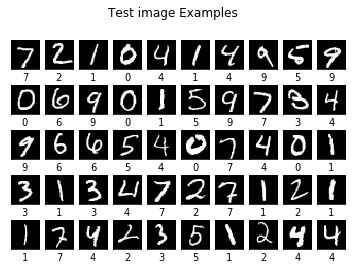

In [4]:
### Bounus 1: show the first 40 images
### ALways a good idea to validate that the data appears as you expect
### 
### for sci-kit learn the images are represented as vectors of 784 elements
### currently scaled from 0 to 1

for i in range(50):
    l1_plot = plt.subplot(5, 10, i + 1)
    l1_plot.imshow(255 * X_test[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.gray)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    #l1_plot.set_xlabel('Class %s' % y_test[i].decode())
    l1_plot.set_xlabel('%i' % int(y_test[i]))
plt.suptitle('Test image Examples')
plt.show()

4.The data need to be standardized before it can be input into the classifier. And the scaler.fit_tansform and scaler.transform functions are
called to do the standardization.

In [5]:
## Data standardization
## by the mean and standared deviation of the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 5.Then we use the data set to train the Logistic Regression classifier, and the Sparsity with L1 penalty appears to be 16.89%, the test score calculated is 0.8917.

In [6]:
#train and test classifier
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / 1000,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)
# Train the classifier
clf.fit(X_train, y_train)

#Evaluate the classifier
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 16.89%
Test score with L1 penalty: 0.8917


In [7]:
## For analysis show also the confusion matrix

from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test)
cfm = confusion_matrix(y_test, y_predict)
print (cfm)

[[ 951    0    1    2    0   10   11    1    4    0]
 [   0 1103    3    3    1    1    4    0   20    0]
 [  16   21  871   23   18    0   19   23   38    3]
 [   5    8   20  892    1   31    8   18   19    8]
 [   2   10    4    0  903    2   13    2    4   42]
 [  13    9    5   46   23  721   21   14   26   14]
 [  16    9    7    0   11   18  892    1    4    0]
 [   1   34   18    5   12    0    1  915    1   41]
 [  10   28    9   29   20   38    9   17  797   17]
 [  18    9    4   13   53    5    0   32    3  872]]


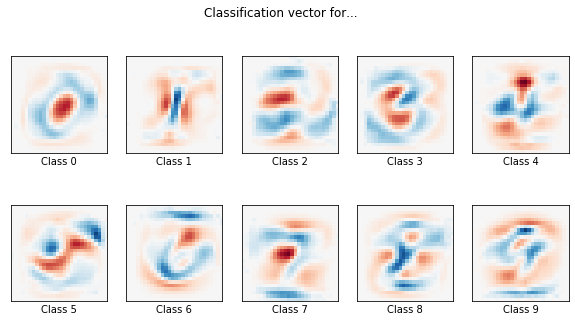

In [8]:
# Bonus 2: Visualization of the weights
# This is only possible for simple classifiers

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')
plt.show()

In [9]:
### Bonus 3: comfusion matrix visualization tool
## A more elegant preserntation for a confusion matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


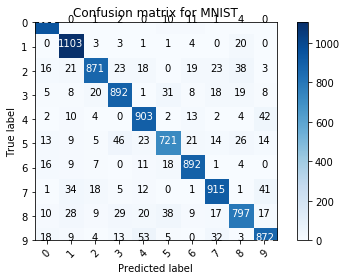

In [10]:
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix for MNIST')

6.Then we define a fucntion called SimpleDataset, which is used to get our own created data set into the training process, using the path of
our created dataset, and the csv file.

In [11]:
""" Custom datatset loader
    based on https://github.com/utkuozbulak/pytorch-custom-dataset-examples
"""
import pandas as pd
import imageio

class SimpleDataset():
    def __init__(self, data_path, csv_name, transform = None ):
        """
        Args:
            data_path (string): path to the folder where images and csv files are located
            csv_name (string): name of the csv lablel file
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Set path
        self.data_path = data_path
        # Read the csv file
        self.data_info = pd.read_csv(data_path + csv_name, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Calculate len
        self.data_len = len(self.data_info.index)
        
    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = imageio.imread(self.data_path + single_image_name)
        
        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]
        
        return (img_as_img, single_image_label)

    def __len__(self):
        return self.data_len

Here we input the path of our own dataset, and also provide the name of the csv file, which is used to define the input image and the expeted
output.In this part, what we need to care about is to tranfer the content in the csv file from char to int, so that we can do the comparison, and get the right Loss function.The method to do this is calling the function "for i in range(len(y)):
    y_trans.append(int(y[i]))
    y = np.asarray(y_trans)"
Then the number of the images and the size of the images are shown below:

In [12]:
mydata = SimpleDataset( "C:/Users/louis/Desktop/imageset/", "labels.csv")

#splitting into images and labels 
X = []
y = []
for i in range(len(mydata)):
    X.append(mydata[i][0])
    y.append((mydata[i][1]))

#converting into numpy arrays to enable easy reshaping and other array operations
    
X = np.asarray(X)
print("Shape of the input image", X.shape)
y_trans = []
for i in range(len(y)):
    y_trans.append(int(y[i]))
y = np.asarray(y_trans)
##y= np.asarray(y)

Shape of the input image (60, 28, 28)


Then we just plot the 60 test images (numbers and non-numbers): The expected value of the non-numbers are defined as 11

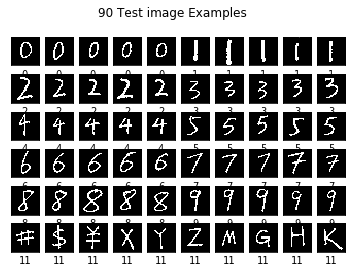

In [13]:
### Bounus 1: show the test 50 images
### ALways a good idea to validate that the data appears as you expect
### 
### for sci-kit learn the images are represented as vectors of 784 elements
### currently scaled from 0 to 1
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
for i in range(60):
    l1_plot = plt.subplot(6, 10, i + 1)
    l1_plot.imshow(255 * X[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.gray)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    #l1_plot.set_xlabel('Class %s' % y_test[i].decode())
    l1_plot.set_xlabel('%i' % int(y[i]))
plt.suptitle('90 Test image Examples')
plt.show()

After that, we input our own test images and output the Test score with L1 penalty and the test score. Besides, the predicted value and expected values are also printed. The resultis that the Test score is 0.20, and a lot of number predicted didn't match the expected number. The reason for this low score maybe because the writing style between me and the people who create the MNIST dataset is quite different. As a result, the model trained by their numbers cannot properly work on my own dataset.

In [14]:
#reshaping the array into flattened 784 array as an input for prediciton by the logistic regression classifier
X = X.reshape(X.shape[0], 784)
X = X / 255.
#data standardiation with the training set statistics is required for this clasifier
X = scaler.transform(X)

y_pred = clf.predict(X)

score = clf.score(X, y)

print("Test score with L1 penalty: %.4f" % score)
print("y_predicted_values", y_pred)
print("y_labels", y)

Test score with L1 penalty: 0.2000
y_predicted_values [9 9 9 9 9 1 7 1 1 1 3 1 1 3 1 5 9 1 1 3 1 1 1 1 1 1 9 1 5 5 6 5 5 5 6 1 1
 1 3 9 1 8 3 8 8 1 1 1 1 1 9 6 6 1 5 2 4 9 4 9]
y_labels [ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  7  7  7  7  7  8  8  8  8  8  9  9  9
  9  9 11 11 11 11 11 11 11 11 11 11]


Part B: Experiments with classifiers

1. We need to import the MLPClassfier and KNeighborsClassifier from the libraries

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier 

Then we read the MINST dataset again:

In [16]:
#.  read the NMIST dataset
memory = Memory(get_data_home())
@memory.cache()
def fetch_mnist():
    content = urlopen(
        'https://www.openml.org/data/download/52667/mnist_784.arff').read()
    data, meta = loadarff(io.StringIO(content.decode('utf8')))
    data = data.view([('pixels', '<f8', 784), ('class', '|S1')])
    return data['pixels'], data['class']
X, y = fetch_mnist()

After we read the whole dataset, we need to define the range of the training dataset and the test dataset. The training dataset is ranging from [0:30000] with 30000 datas, and the test dataset is ranging from [69500:70000] with 500 datas. In Part A, the traning dataset is set to be 60000, but here we set it to be 30000, which is lower than before. It decrese the test score and the prediction accuracy, because the training data is less, but it can save the traning time of the models.

In [17]:
# rescale the data, use the traditional train/test split

X = X / 255.
y_trans = []
for i in range(len(y)):
    y_trans.append(int(y[i]))
y = np.asarray(y_trans)
###### NEW  Refromat the the labels to be integers rather than byte arrays

X_train, X_test = X[:30000], X[69500:]
y_train, y_test = y[:30000], y[69500:]

Again, we need to do the standardization to the data from the dataset before proceed to the training stage.

In [18]:
## Data standardization
## by the mean and standared deviation of the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2. Then we need to train the KNN Classifier, we set the n_neighbors to be 1, and the Training time, and Test time are shown below. It also shows that the Test score with this model is 1.0.

In [19]:
import time
start_time = time.time()
#Classifier Declaration
KNN = KNeighborsClassifier(n_neighbors=1)
#Train the classifier
KNN.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = KNN.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with KNN_1 is: %.4f" % score)

Training time 25.352 seconds
Test time 65.043 seconds
Test score with KNN_1 is: 1.0000


3. We set the n_neighbors to be 3, and the Training time, and Test time are shown below. It also shows that the Test score with this model is a little lower to be 0.96.

In [20]:
import time
start_time = time.time()
#Classifier Declaration
KNN = KNeighborsClassifier(n_neighbors=3)
#Train the classifier
KNN.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = KNN.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with KNN_3 is: %.4f" % score)

Training time 24.097 seconds
Test time 68.338 seconds
Test score with KNN_3 is: 0.9600


4. We set the n_neighbors to be 5, and the Training time, and Test time are shown below. It also shows that the Test score with this model is
much lower to be 0.9420

In [21]:
import time
start_time = time.time()
#Classifier Declaration
KNN = KNeighborsClassifier(n_neighbors=5)
#Train the classifier
KNN.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = KNN.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with KNN_5 is: %.4f" % score)

Training time 24.406 seconds
Test time 71.572 seconds
Test score with KNN_5 is: 0.9420


5. We set the n_neighbors to be 7, and the Training time, and Test time are shown below. It also shows that the Test score with this model is
much lower to be 0.9340. As a resul, with the number of nearest neighbors increase, the test score will tend to go down.

In [22]:
import time
start_time = time.time()
#Classifier Declaration
KNN = KNeighborsClassifier(n_neighbors=7)
#Train the classifier
KNN.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = KNN.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with KNN_7 is: %.4f" % score)

Training time 24.270 seconds
Test time 69.171 seconds
Test score with KNN_7 is: 0.9340


6. Then we begin to evaluate the multi-layer perceptron classfiers, the first one is a single hidden layer classifier. The result is shown below, The test score is 0.86.

In [23]:
#
import time
start_time = time.time()
#Classifier Declaration
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
#Train the classifier
mlp.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = mlp.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with 3NN is: %.4f" % score)

Iteration 1, loss = 0.29987568
Iteration 2, loss = 0.14332593
Iteration 3, loss = 0.10710160
Iteration 4, loss = 0.08724256
Iteration 5, loss = 0.07487353
Iteration 6, loss = 0.06652869
Iteration 7, loss = 0.05949608
Iteration 8, loss = 0.05326127
Iteration 9, loss = 0.04840507
Iteration 10, loss = 0.04466067
Training time 6.500 seconds
Test time 0.002 seconds
Test score with 3NN is: 0.8600


7.And we begin to evaluate the multi-layer perceptron classfiers, the two hidden layer classifier. The result is shown below, The test score is also 0.8480.

In [24]:
# 2-layer perceptron classifier
import time
start_time = time.time()
#Classifier Declaration
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
#Train the classifier
mlp.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = mlp.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with 2-layer perceptron classifier is: %.4f" % score)

Iteration 1, loss = 0.29458299
Iteration 2, loss = 0.12595665
Iteration 3, loss = 0.09829661
Iteration 4, loss = 0.08259015
Iteration 5, loss = 0.07150121
Iteration 6, loss = 0.06209640
Iteration 7, loss = 0.05810004
Iteration 8, loss = 0.05167699
Iteration 9, loss = 0.04498609
Iteration 10, loss = 0.04415715
Training time 8.235 seconds
Test time 0.002 seconds
Test score with 2-layer perceptron classifier is: 0.8480


8.Next we need to import the Support Vector Mechine in order to evaluate the SVM

In [25]:
from sklearn import datasets, svm, metrics
SVC = svm.SVC

9.First we evaluate the Linear Function of the SVM, and the Test Score turns out to be 0.7320

In [26]:
import time
start_time = time.time()
#Classifier Declaration
clf = SVC(kernel = 'linear', C = 1)
#Train the classifier
clf.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = clf.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with linear function is: %.4f" % score)

Training time 488.541 seconds
Test time 4.524 seconds
Test score with linear function is: 0.7320


Then is the Polynomial Function of the SVM, the test score is also 0.5140.

In [27]:
import time
start_time = time.time()
#Classifier Declaration
clf = SVC(kernel = 'poly', degree = 3, C = 1)
#Train the classifier
clf.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = clf.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with polynomial function SVM is: %.4f" % score)

Training time 6271.191 seconds
Test time 25.944 seconds
Test score with polynomial function SVM is: 0.5140


Finally, we test the radial basis function of the SVM, and the test score is again 0.1040

In [28]:
import time
start_time = time.time()
#Classifier Declaration
clf = SVC(kernel = 'rbf', C = 1, gamma = 0.5)
#Train the classifier
clf.fit(X,y)
train_time = time.time() - start_time
start_time = time.time()
print("Training time %.3f seconds" % train_time)
#Evaluate the result
score = clf.score(X_test,y_test)
test_time = time.time() - start_time
print("Test time %.3f seconds" % test_time)
print("Test score with the radial basis function SVM is: %.4f" % score)

Training time 23085.615 seconds
Test time 28.067 seconds
Test score with the radial basis function SVM is: 0.1040
